<a href="https://colab.research.google.com/github/HanJaeHui-GitHub/ESAA/blob/main/ESAA_YB_Week07_markdown(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7주차 과제_1018(금)

EDA To Prediction(DieTanic)

## Part 1 : Exploratory Data Analysis(EDA)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ESSA/데이터/DieTanic_train.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull().sum() #checking for total null values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


age, cabin, embarked have null values

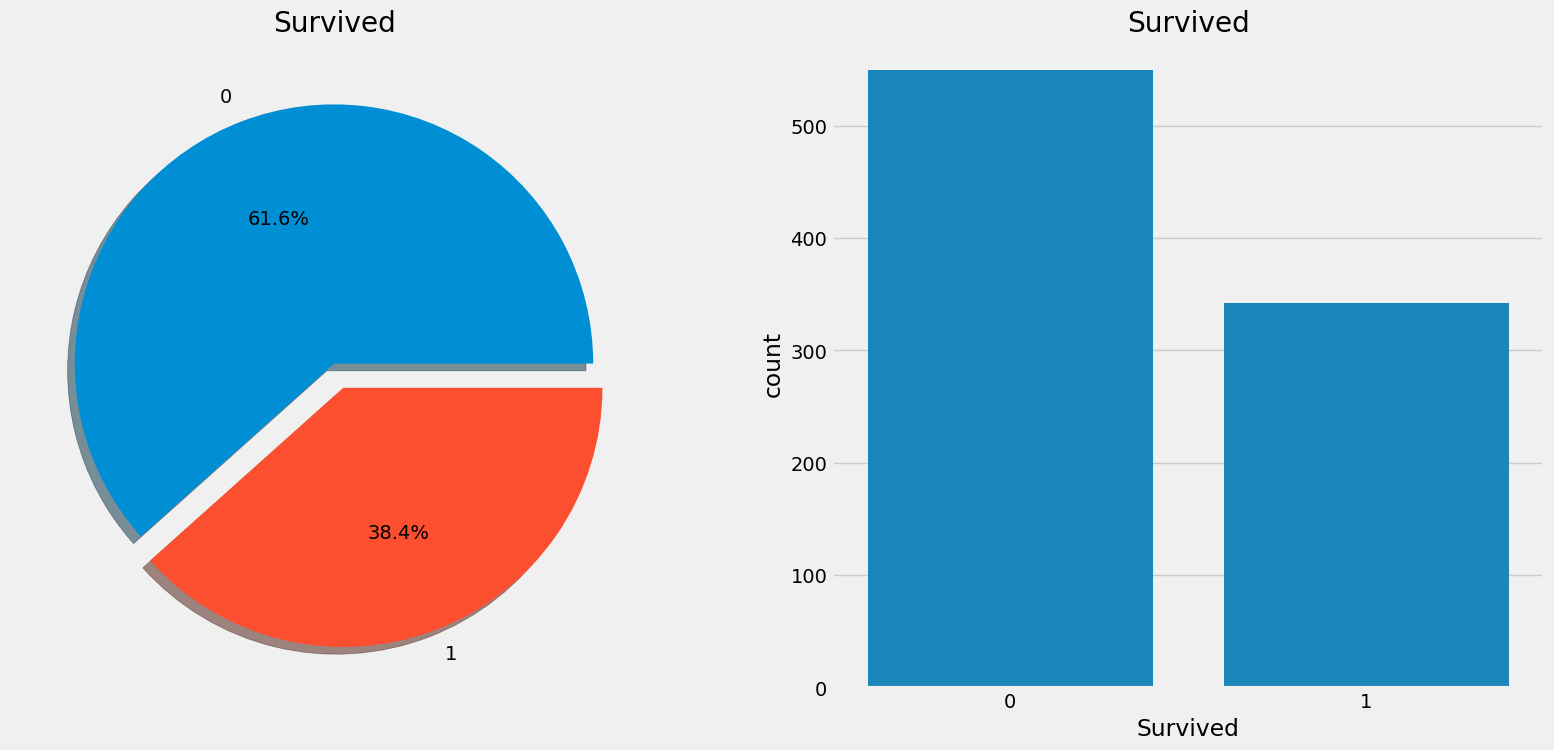

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## Types Of Features

- Categorical Features : Sex, Embarked

- Ordinal Features : PClass

- Continous Feature : Age

## Analysing The Features

### Sex → Categorical Feature

In [ ]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

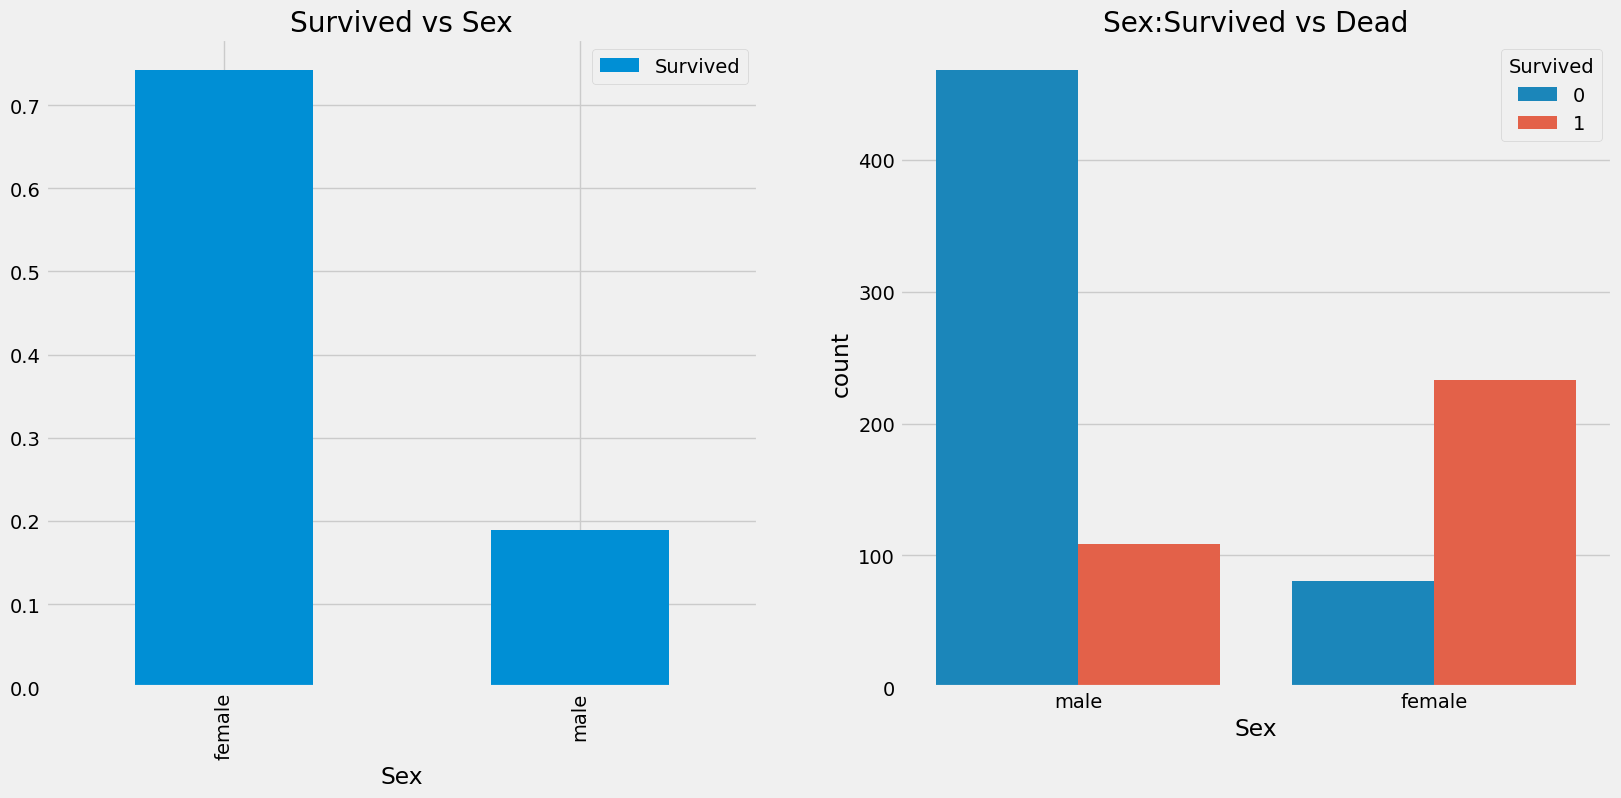

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

The survival rates for a women on the ship is around 75% while that for men in around 18-19%

### Pclass → Ordinal Feature

In [ ]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


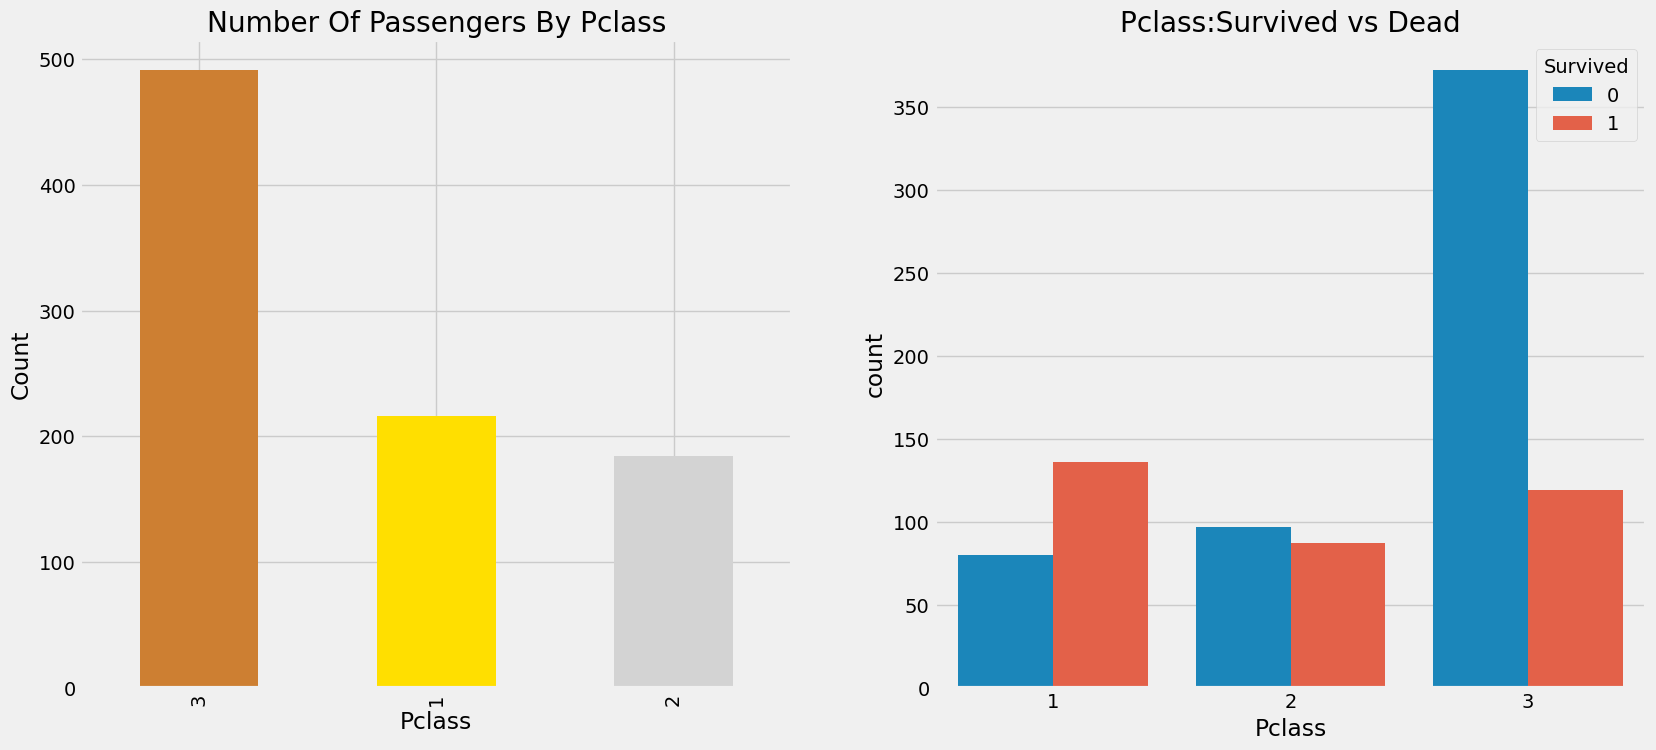

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

Pclass 1 were given a very high priority while rescue. Even though the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhrer around 25%.

Survived rate

Pclass 1 : 63% / Pclass 2 : 48% → money and status matters

In [ ]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

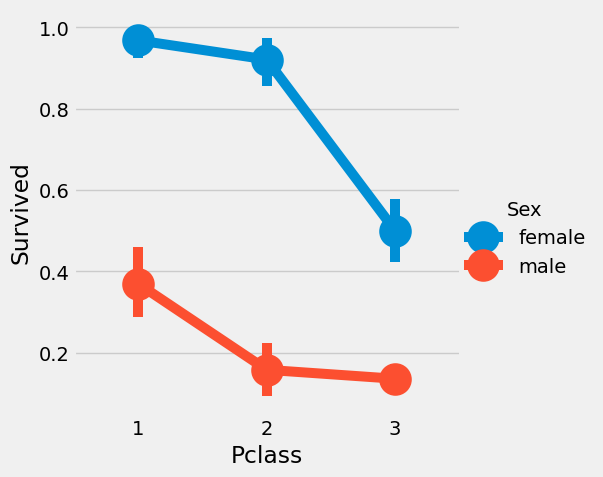

In [ ]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')
plt.show()

Survival for women from Pclass 1 is about 95-96%(3 out of 94 women from Pclass 1 died)

### Age → Continous Feature

In [ ]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


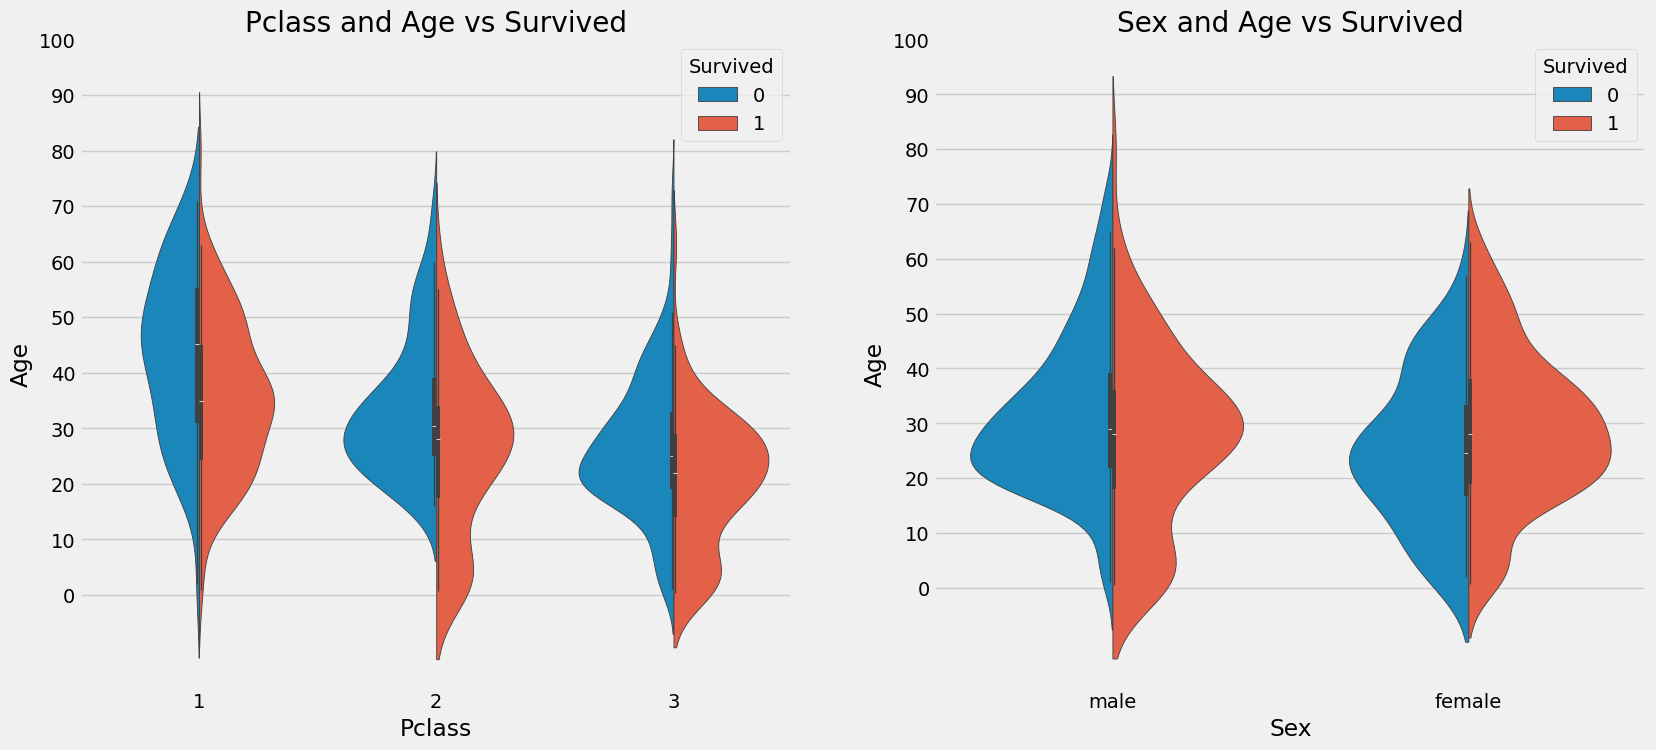

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

Obeservations

1. The number of children increases with Pclass and the survival rate for passenegers below Age 10 looks to be good irrespective of the Pclass

2. Survival chances for Passenegers aged 20-50 from Pclass 1 is high and is even better for women

3. For males the survival chances decreases with an increase in age

Age feature has 177 null values

↪ we can check Name feature, and we can assign the mean values of Mr and Mrs to the respective groups

In [ ]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [ ]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


In [ ]:
# Filling NaN Ages
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [ ]:
data.Age.isnull().any() #So no null values left finally

False

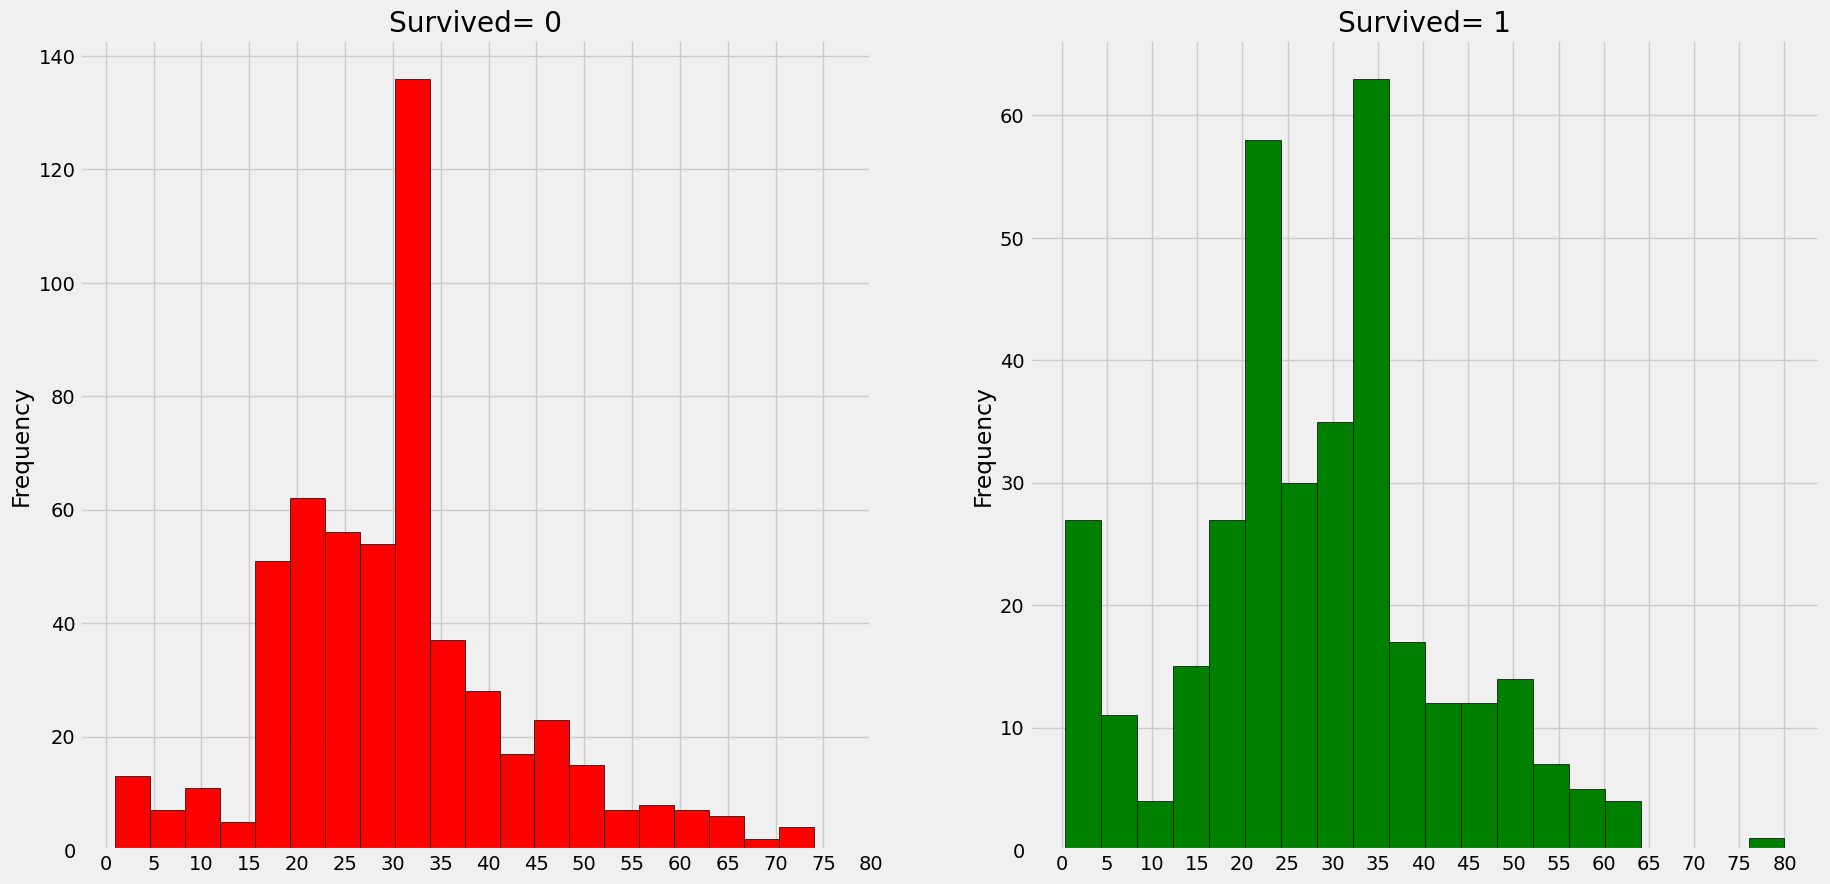

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

Observations

1. The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy)

2. The oldest Passenger was saved(80 years)

3. Maximum number of deaths were in the age group of 30-40

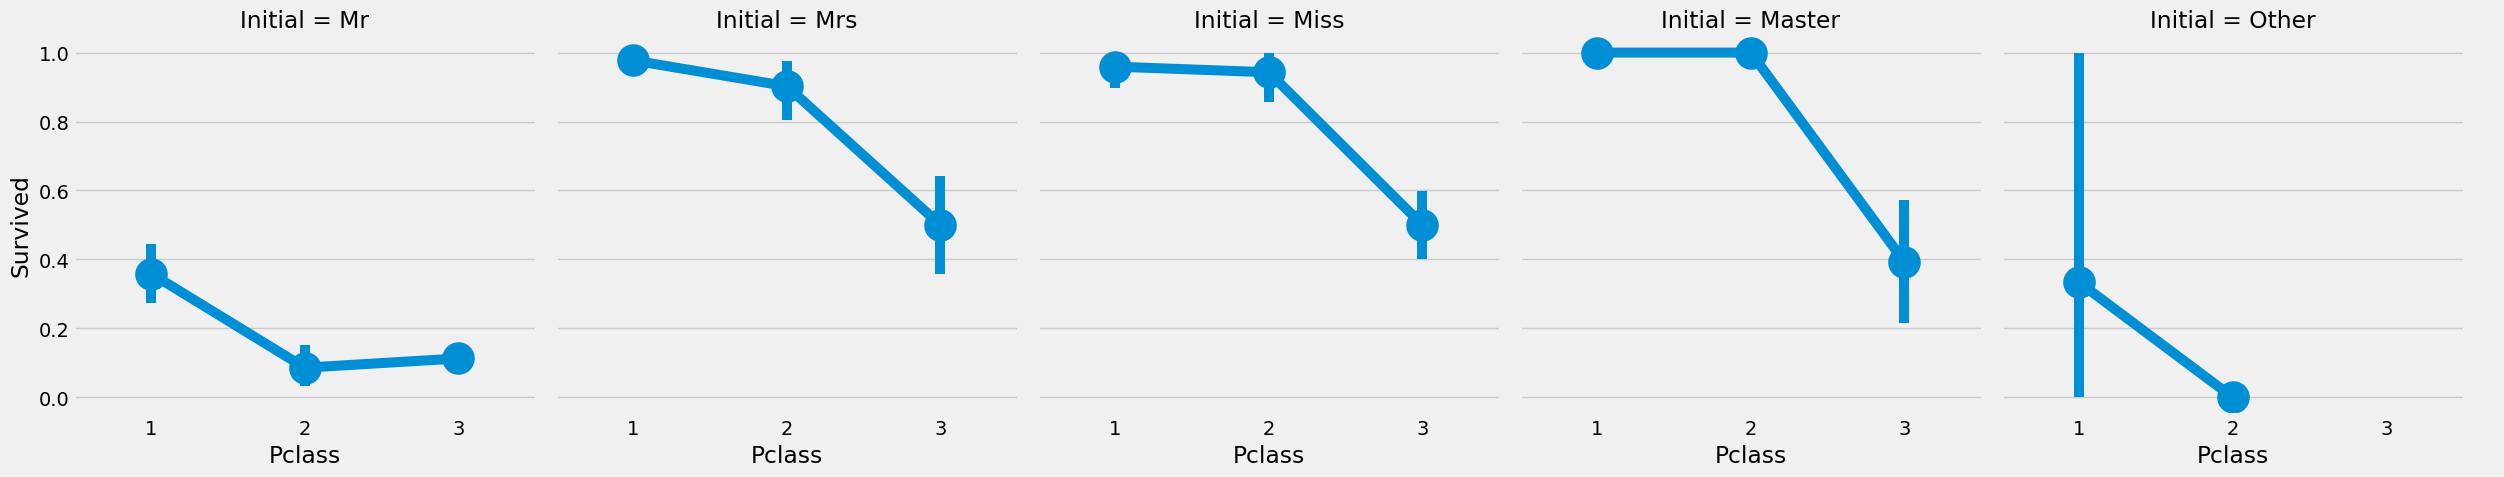

In [ ]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind='point')
plt.show()

The Women and Child first policy thus holds true irrespective of the class

### Embarked → Categorical Value

In [ ]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

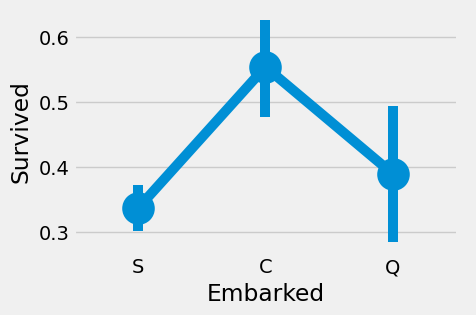

In [ ]:
# Chances for Survival by Port Of Embarkation
sns.catplot(x='Embarked',y='Survived',data=data,kind='point')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The chances for survival for Port C is highest around 0.55 while the lowest for S

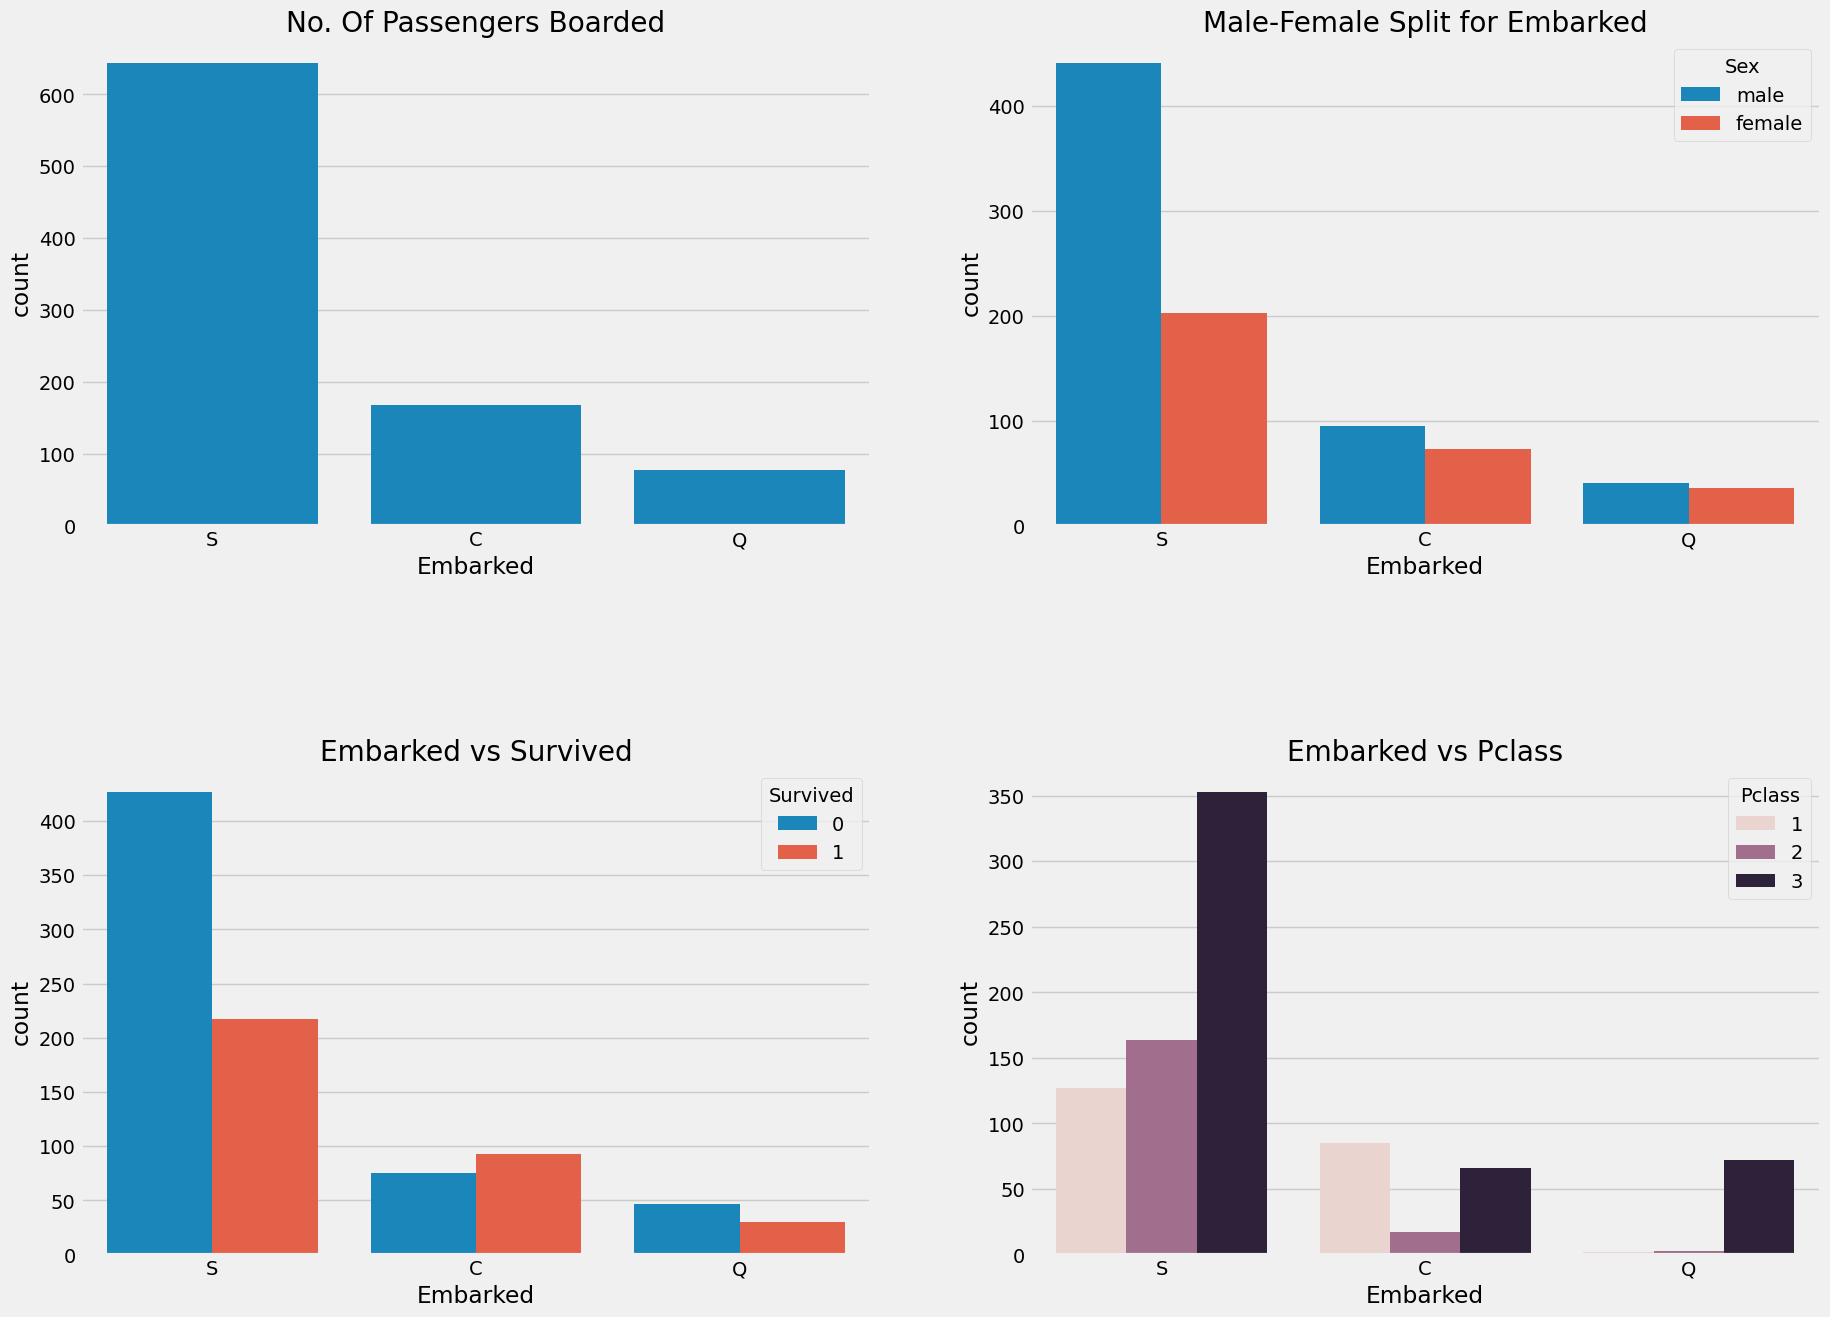

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

Observations

1. Maximum passenegers boarded from S. Majority of them being from Pclass3.

2. The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.

3. The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.

4. Port Q had almost 95% of the passengers were from Pclass3.

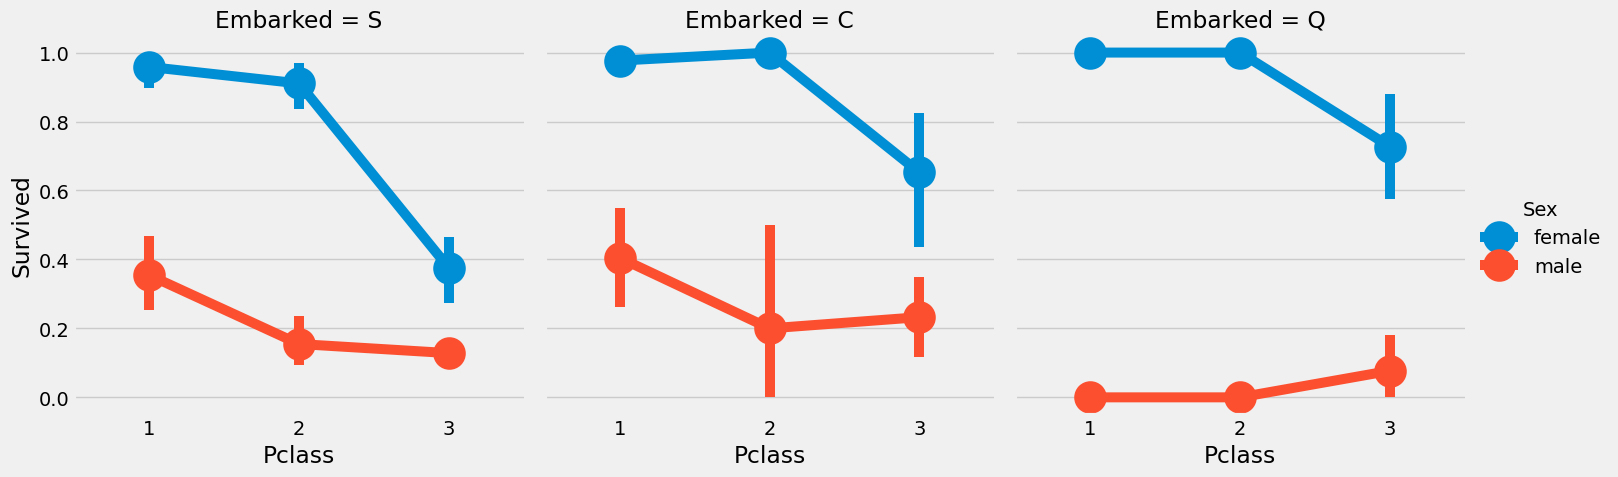

In [ ]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=data,kind='point')
plt.show()

Observations

1. The survival chances are almost 1 for women for Pcalss 1 and Pclass 2 irrespective of the Pclass

2. Port S looks to be very unlucky for Pclass 3 Passenegers as the survival rate for both men and women is very low → Money matters

3. Port Q looks to be unlukiest for Men. as almost all were from Pclass 3

In [ ]:
# Filling Embarked NaN
## As we saw that maximum passengers boarded from Port S, we replce Nan with S
data['Embarked'].fillna('S',inplace=True)

In [ ]:
data.Embarked.isnull().any()# Finally No NaN values

False

## SibSip → Discrete Feature

In [ ]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


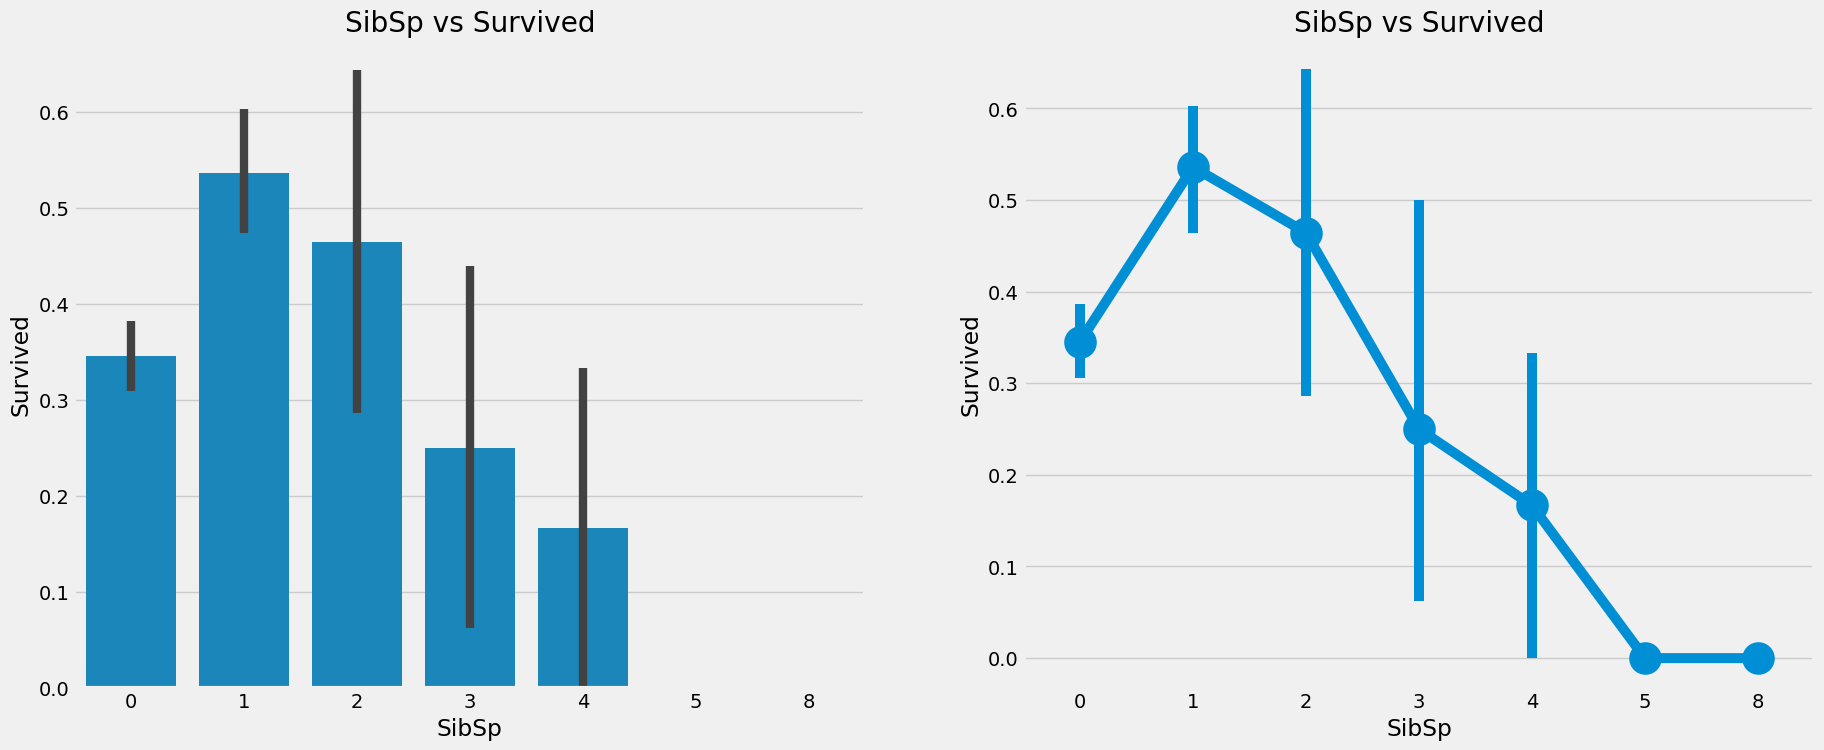

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(x='SibSp', y='Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [ ]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Observation

The barplot and pointplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate.

The graph roughly decrease if the number of siblings increase.(We can guess many passangers try to save their family instead of saving themselves first)

The survival for families with 5-8 members is 0% → The reason is Pclass, Person with SibSp>3 were all in Pclass 3



## Parch

In [ ]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


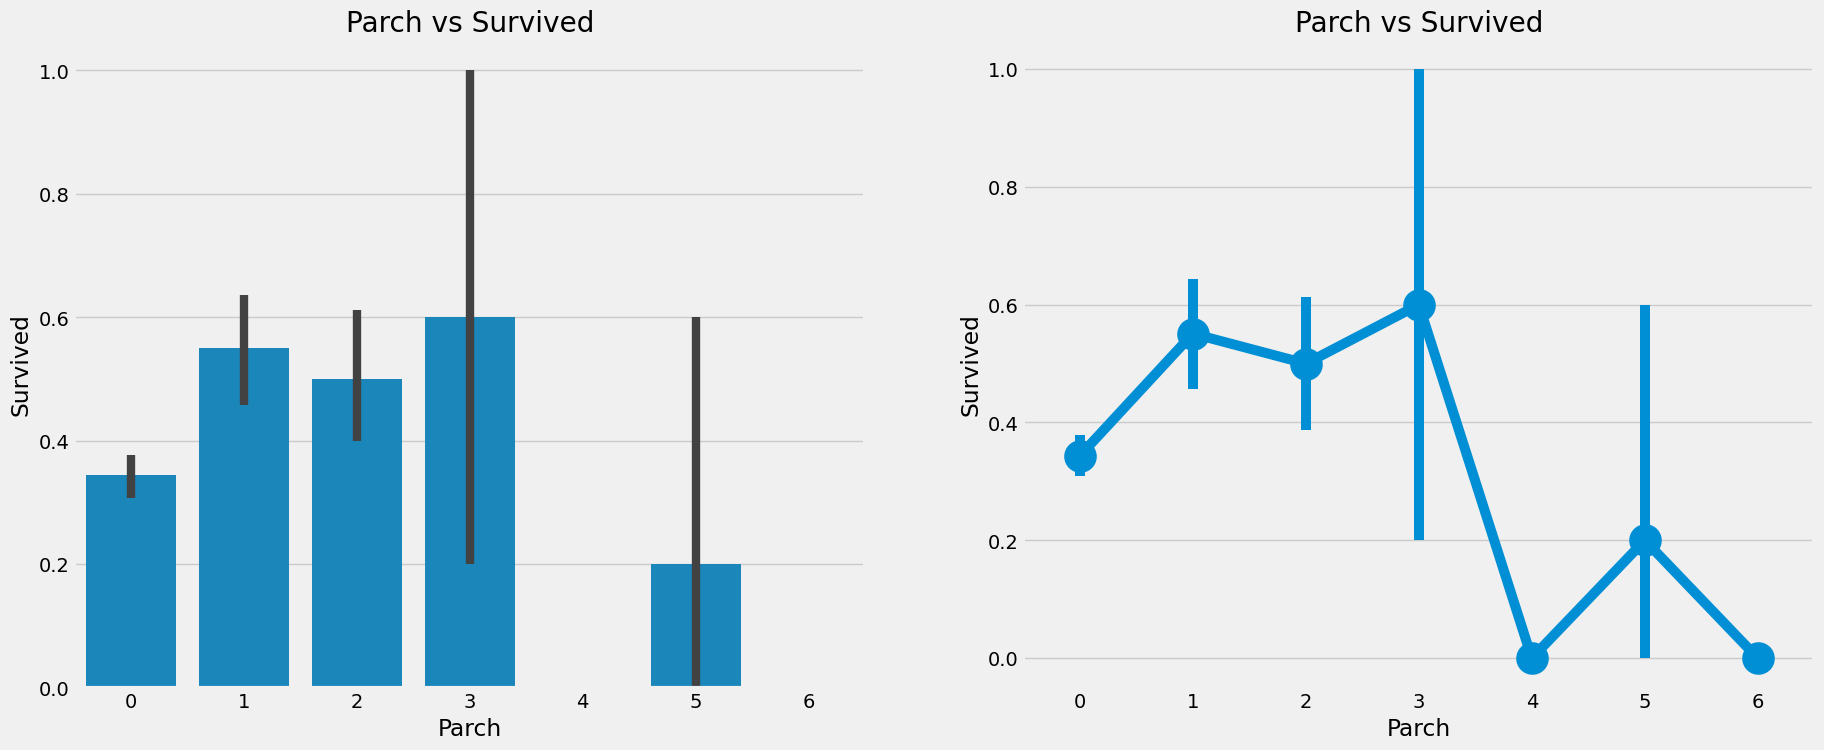

In [ ]:
# The crosstab again shows that larger families were in Pclass3
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(x='Parch',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

Observation

Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.

## Fare → Continous Feature

In [ ]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


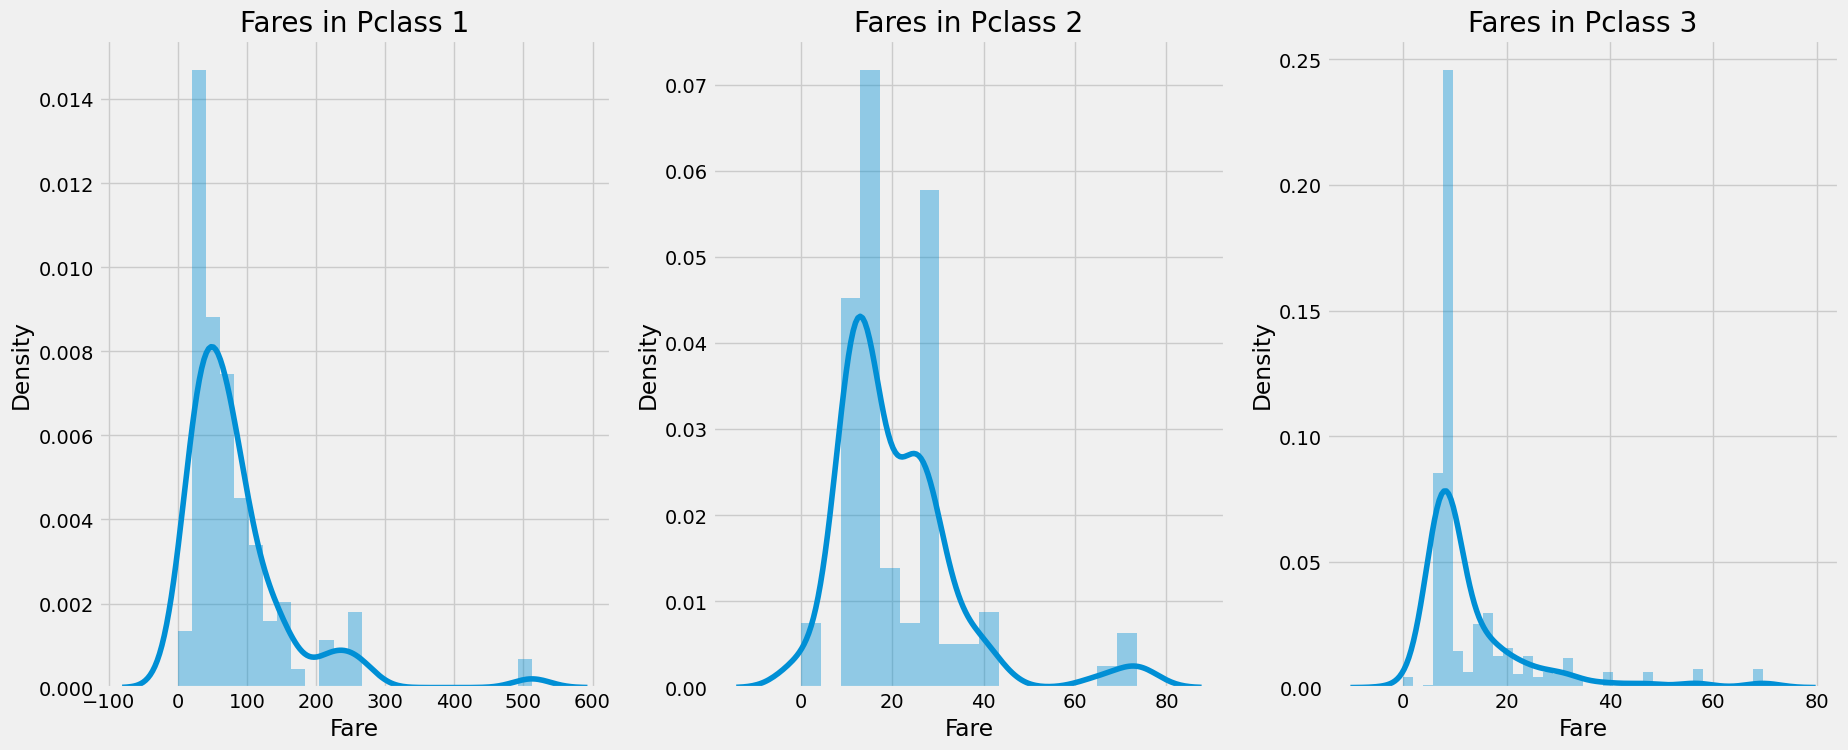

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

## Observations in a Nutshell for all features

Sex : The chance of survival for women is high as compared to men

Pclass : There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chace of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Mattters!

Age : Children less than 5-10 years do have a high chance of survival. Passengers betwwen age group 15 to 35 died a lot.

Embarked : The chances of survival at C looks to be better than even though the majority of Pclass 1 passangers got up at S. Passengers at Q were all from Pclass 3.

Parch + SibSp : Having 1-2 siblings, spouse on board or 1-3 parents shows a greater chance of probablity rather than being alone or having a large family traveling with you.

## Correlation Between The Features

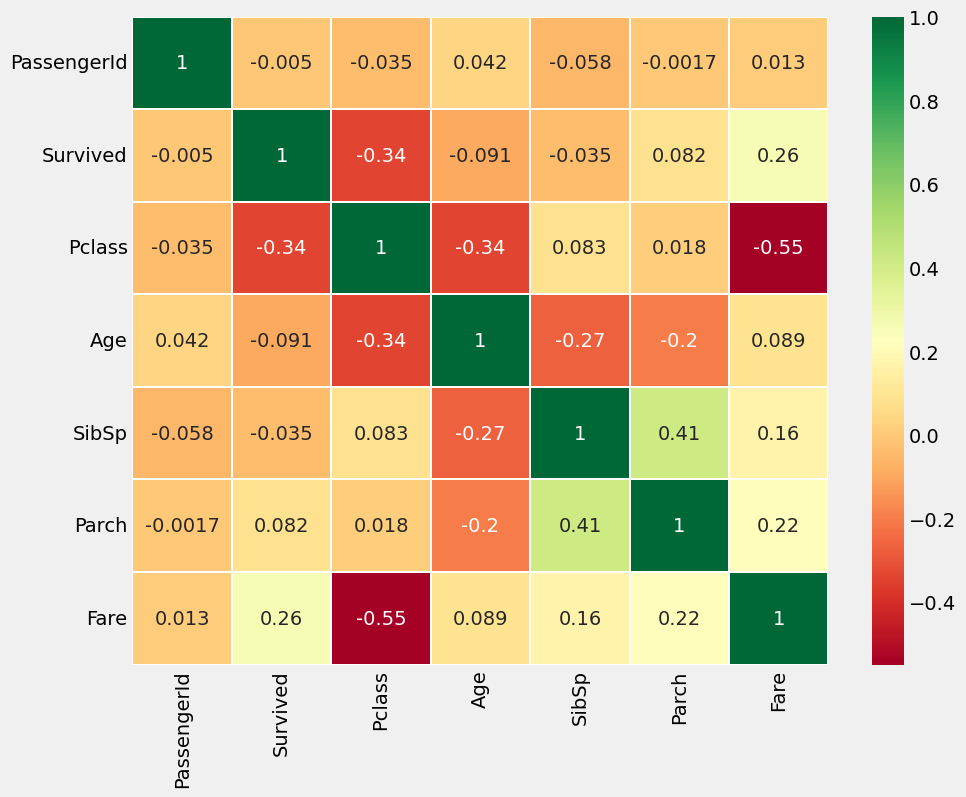

In [ ]:
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

Interpreting The Heatmap

Only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings.

- Positive correlation : increase in feature A leads to increase in feature B / 1 means perfect positive correlation

- Negative correlation : increase in feature A leads to decrease in feature B / -1 means perfect negative correlation

two features are highly or perfectly correlated = increase in one leads t increase in the other = both features are containing highly similar information and there is very little or no variance in information = **MultiColinearity**

## Part 2 : Feature Engineering and Data Cleaning

It is not necessary that all the features will be important.

There maybe be many redundant features which should be eliminated.

## Age_band

Age → continous feature

↪ continous variables have a problem in Machine Learning Models = hard to group them by continous variable

We need to convert these continous values into categorical values by either Binning or Normalisation

In [ ]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [ ]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


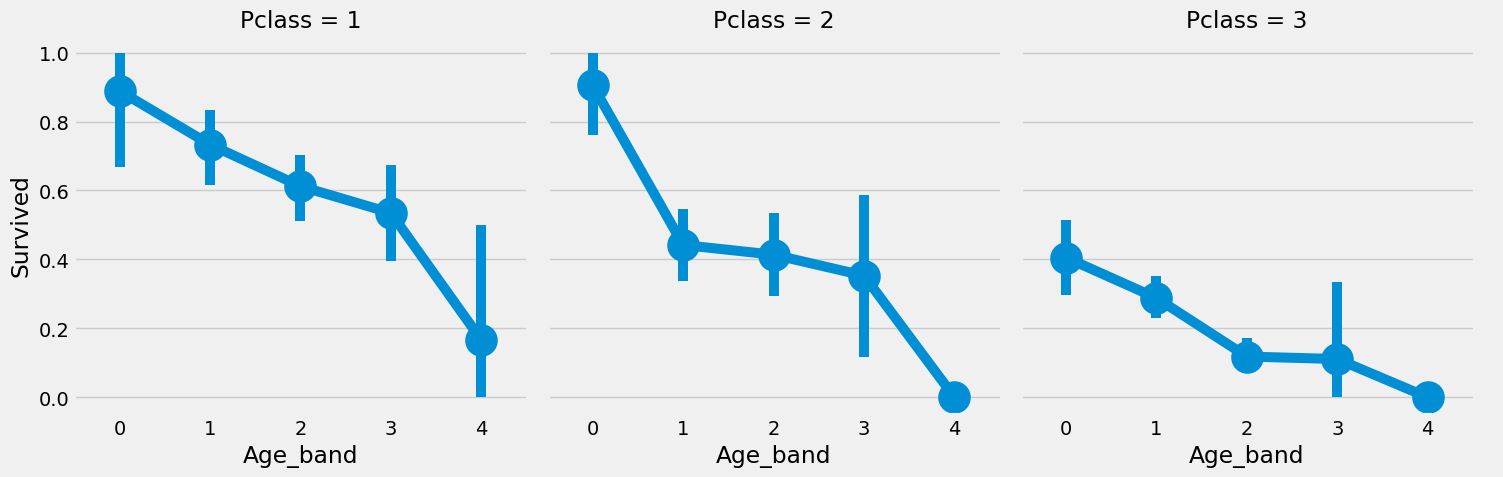

In [ ]:
sns.catplot(x='Age_band', y='Survived', data=data, col='Pclass', kind='point')
plt.show()

## Family_Size and Alone

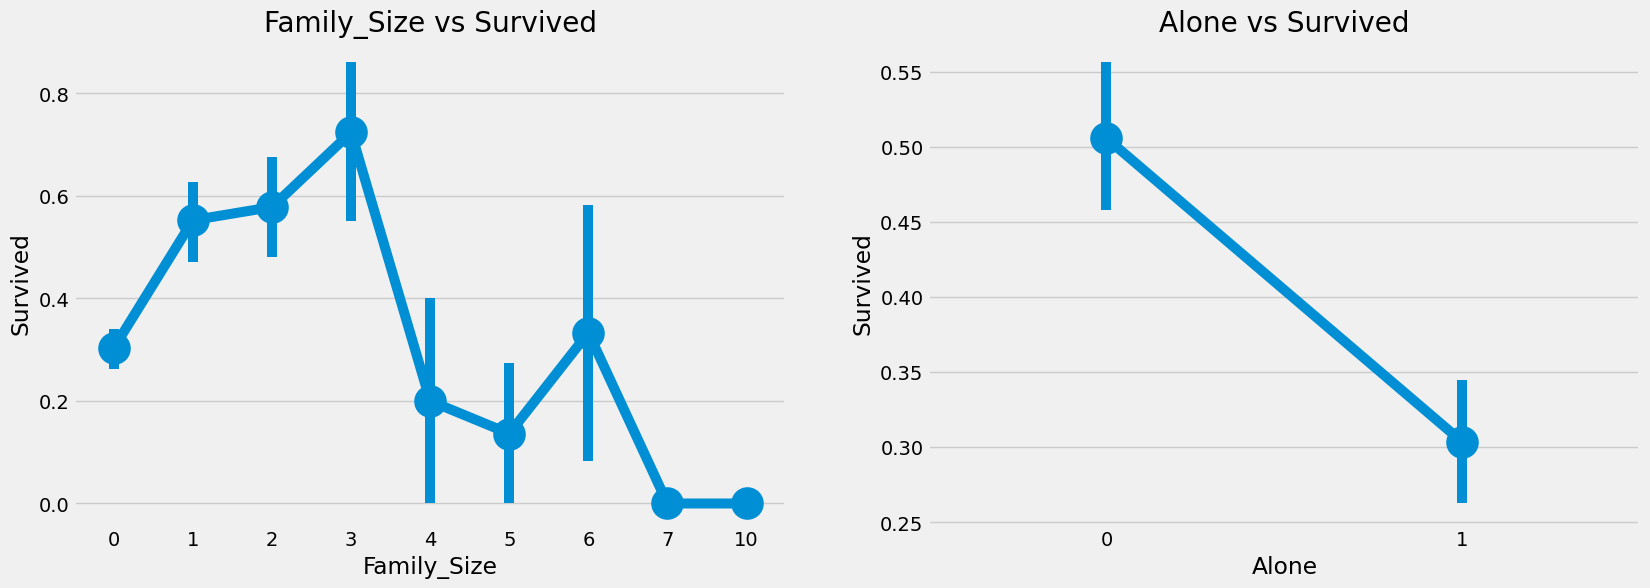

In [ ]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.pointplot(x='Family_Size',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(x='Alone',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

Family_Size = 0 means that the passenger is alone → chances for survival is very low

For Famliy_Size > 4, the chances decrease too

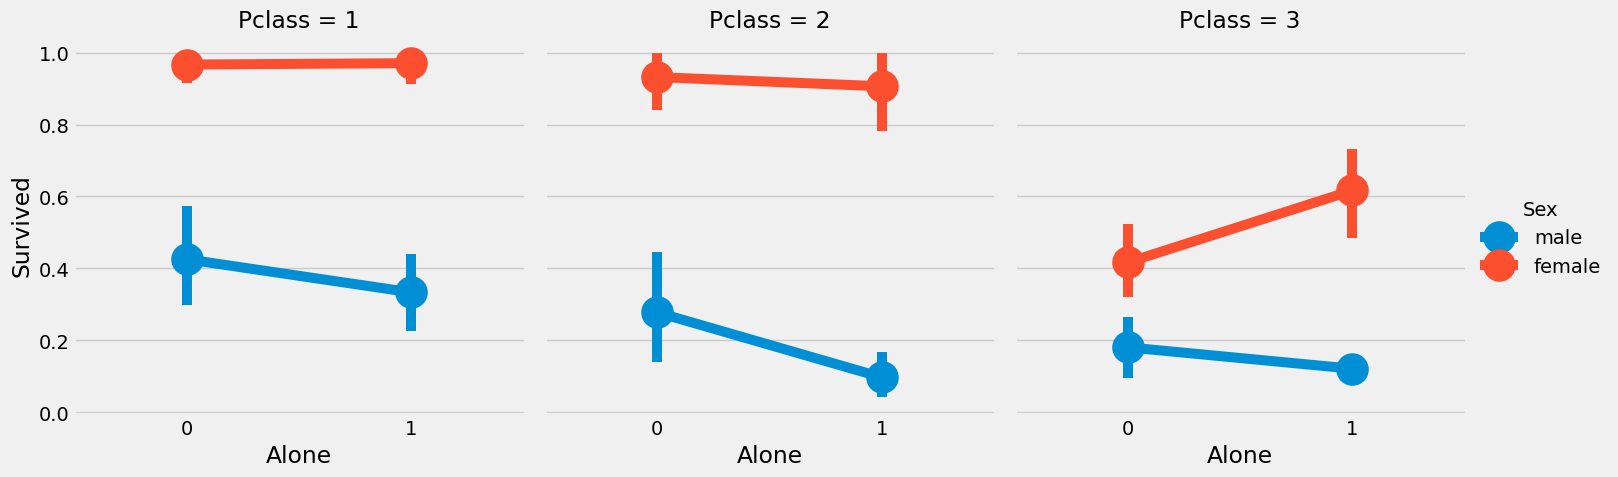

In [ ]:
sns.catplot(x='Alone',y='Survived',data=data,hue='Sex',col='Pclass',kind='point')
plt.show()

It is visible that being alone is harmful irrespecitve of Sex or Pclass except for Pclass 3 where the chances of females who are alone is high than those with family.

## Fare_Range

In [ ]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [ ]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

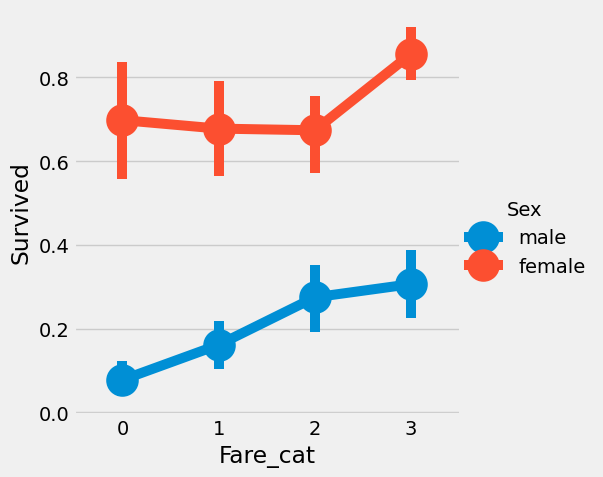

In [ ]:
sns.catplot(x='Fare_cat',y='Survived',data=data,hue='Sex',kind='point')
plt.show()

Fare_cat increases, the survival chances increases.

# Converting String Vlues into Numeric

In [ ]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

Dropping UnNeeded Features

- Name : it cannot be converted into any categorical value → we don't need

- Age : we have the Age_band feature, so unneed

- Ticket : random string → cannot be categorised

- Fare : we have the Fare_cat feature so unneeded

- Cabin : lot of NaN values and also many passengers have multiple cabins → useless feature

- Fare_Range : we have fare_cat feature

- PassengerID : cannot be categorised

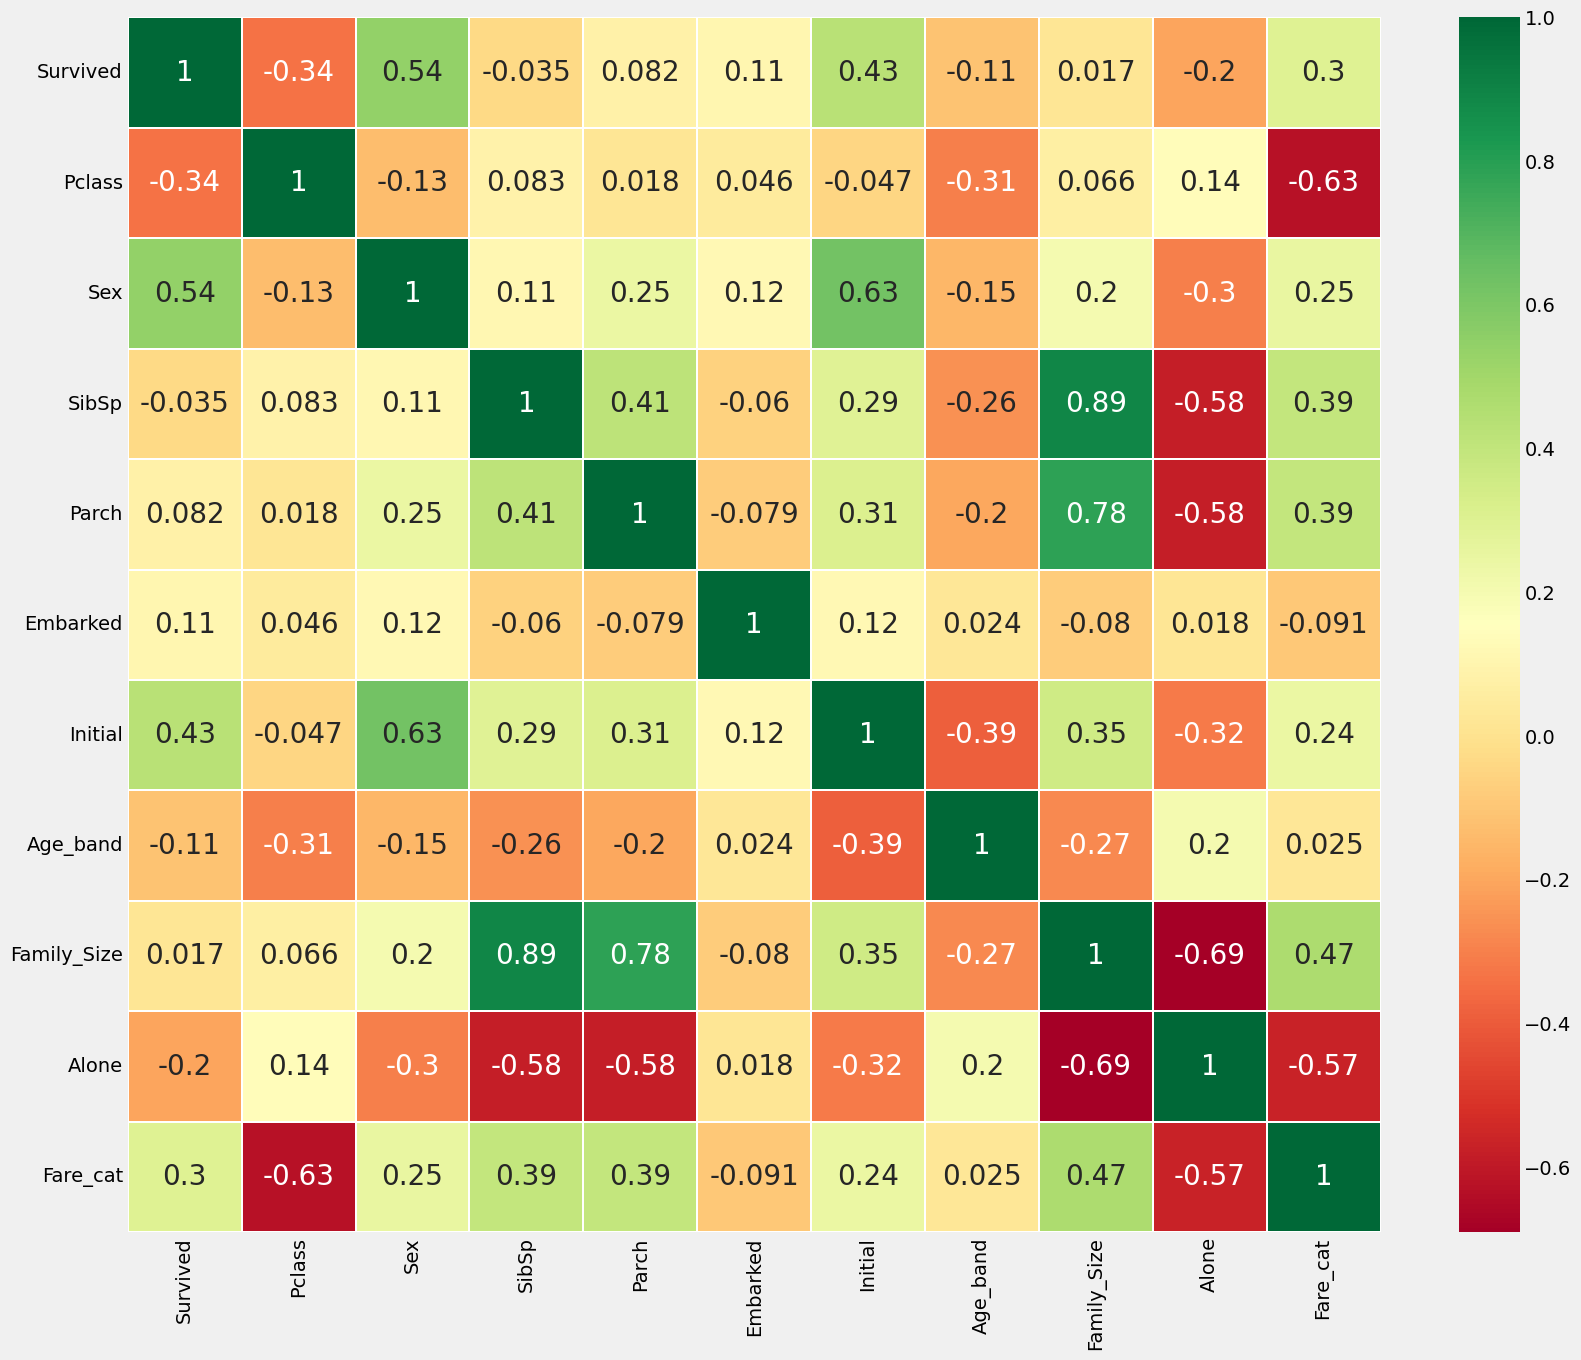

In [ ]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Positively related features : SibSp & Family_Size, Parch & Family_Size

Negative related features : Alone & Family_Size

## Part3 :  Predictive Modeling

In [ ]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [ ]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

**Radial Support Vector Machines(rbf-SVM)**

In [ ]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


**Linear Support Vector Machine(linear-SVM)**

In [ ]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


**Logistic Regression**

In [ ]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


**Decision Tree**

In [ ]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8059701492537313


**K-Nearest Neighbours(KNN)**

In [ ]:
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


n_neighbours atttribute : default = 5

chech the accuracies over various values of n_neighbours

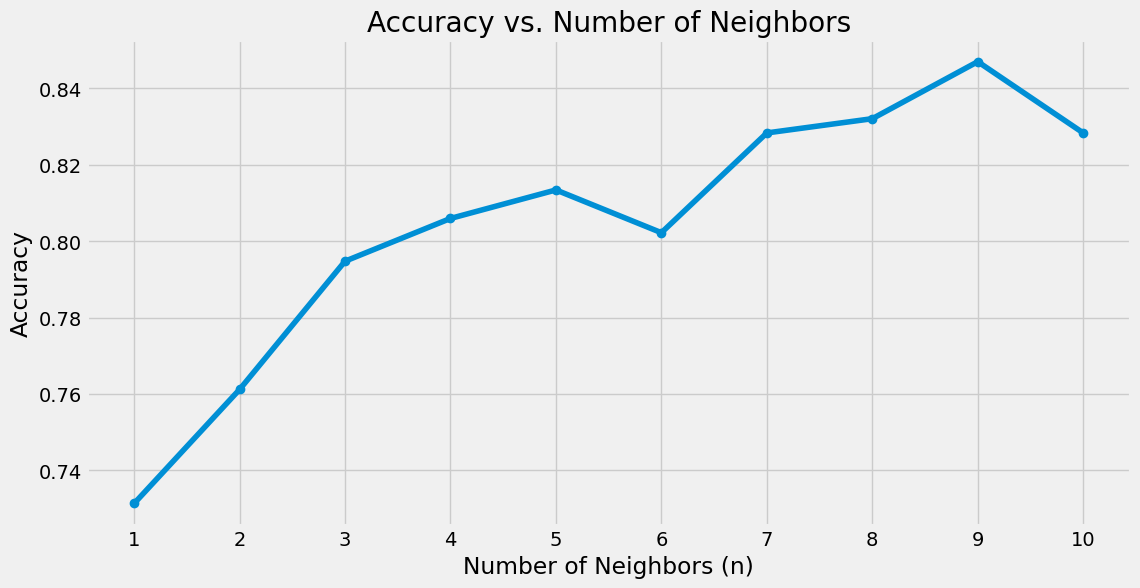

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as 0.8470149253731343


In [ ]:
a_index = list(range(1, 11))
x = list(range(1, 11))
accuracies = []
for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    accuracies.append(metrics.accuracy_score(test_Y, prediction))
a = pd.Series(accuracies)
plt.plot(a_index, a, marker='o')
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.xlabel("Number of Neighbors (n)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Neighbors")
plt.show()
print('Accuracies for different values of n are:', a.values, 'with the max value as', a.values.max())

**Gaussian Navie Bayes**

In [ ]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


**Random Forests**

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8022388059701493


## Cross Validation

Many times the data is imbalanced but less number of other class instances. Thus we should train andn test our algorithm in each and every instance of the dataset.

1. The K-Flod Cross Validation works by first dividing the dataset into k-subsets

2. Let's say we divide the dataset into(k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts

3. We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm = **K-Flod Cross Validation**

4. An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.801361,0.045167
Naive Bayes,0.795843,0.054861
Random Forest,0.810375,0.044526


<Axes: >

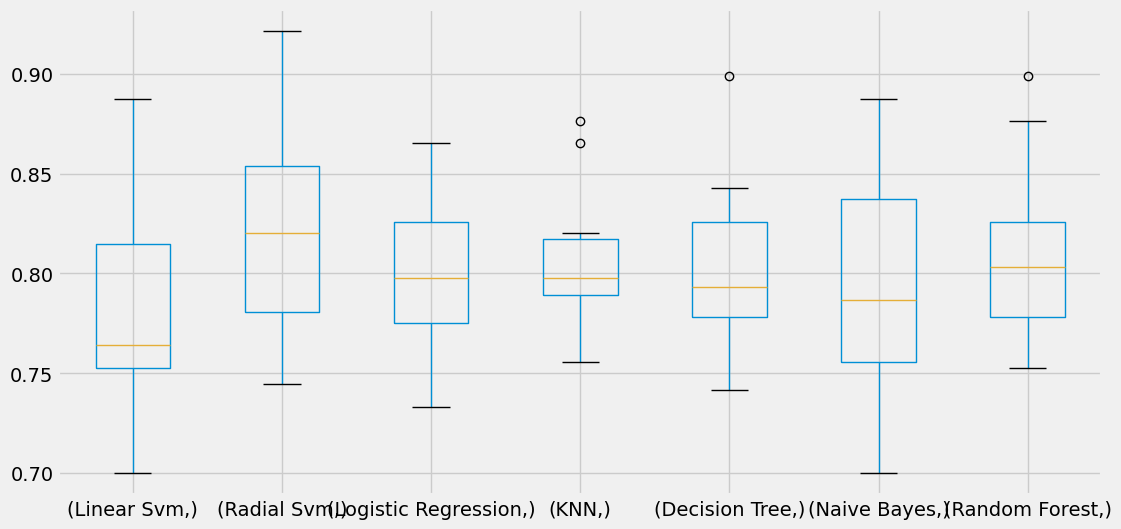

In [ ]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

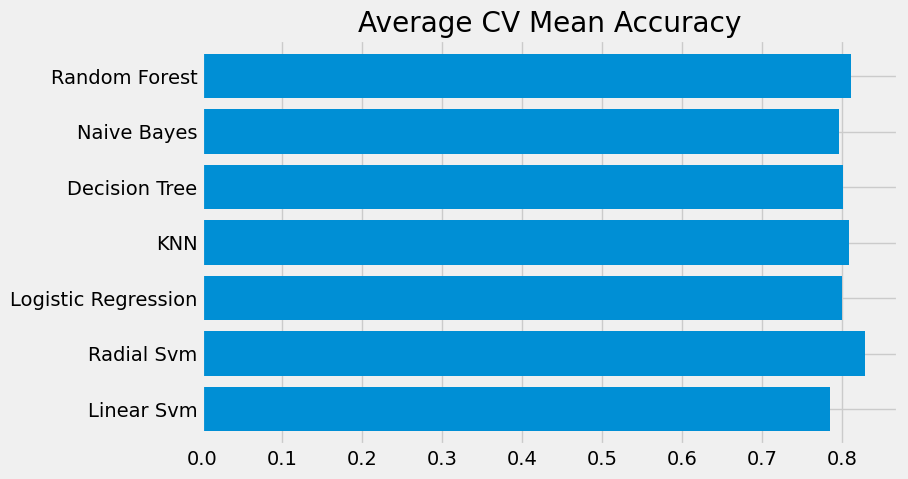

In [ ]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

The classification accuracy can be sometimes misleading due to imbalabce. We can get a summarized result with the help of confusion mattrix, which shows where did the model go wrong, or which class did the model predict wrong.

## Confusion Matrix

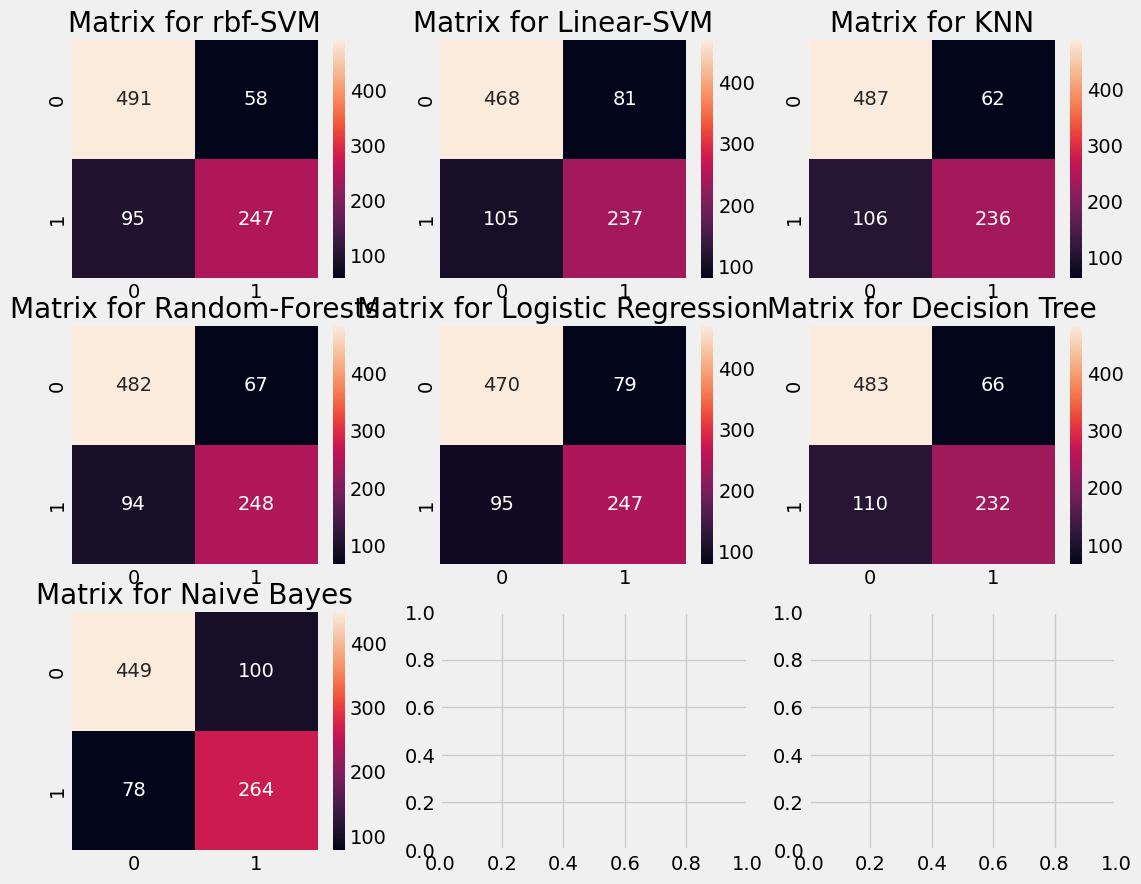

In [ ]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### Interpreting Confusion Matrix

The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made.

Lets consider the first plot for rbf-SVM:

1.The no. of correct predictions are 491(for dead) + 247(for survived) with the mean CV accuracy being (491+247)/891 = 82.8% which we did get earlier.

2.Errors--> Wrongly Classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.

### Hyper-parameters Tuning

**SVM**

In [ ]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


The best score for Rbf-SVM is 82.83% with C = 0.4 and gamma = 0.3

**Random Forests**

In [ ]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


For RandomForest score is abt 81.93% with n_estimators=300

## Ensembling

Combination of various simple models to create a single powerful model

### Voting Classifier

simplest way of combining predictions from many different simple machine learning models

it gives an average prediction result based on the prediction of all the submodels

submodels or the basemodels are all of different types

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ],
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring= "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8237952559300874


### Bagging

general ensemble method

applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions

Due to the averaging there is reduction in variance

use similar classifiers

**Bagged KNN**

Bagging works best with models with high variance(ex. Decision Tree or Random Forests)

We can use KNN with small value of n_neighbours as small value of n_neighbours

In [ ]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


**Bagged DecisionTree**

In [ ]:
model=BaggingClassifier(estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


### Boosting

ensembling technique which uses sequential leanring of classifiers

Boositing works as follows:

A model is first trained on the complete dataset → the model will get some instances right while some wrong → in the next iteration, the learner will focus more on the wrongly predicted instances or gice more weight to it → thus it will try to predict the wrong instance correctly → this iterative process continous, and neww classifiers are added to the model until the limit is reached on the accuracy

**AdaBoost(Adaptive Boosting)**

The weak learner or estimator in this case is a Decision Tree

But we can change the default base_estimator to any algorithm of our choice

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


**Stochastic Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


**XGBoost**

In [ ]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


We got the highest accuracy for AdaBoost

We will try to increase it with Hyper-Parameter Tuning

**Hyper-Parameter Tuning for AdaBoost**

In [ ]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


The maximum accuracy we can get with AdaBoost is 82.93% with n_estimators = 100, and learning_rate = 0.1

**Confusion Matrix for the Best Model**

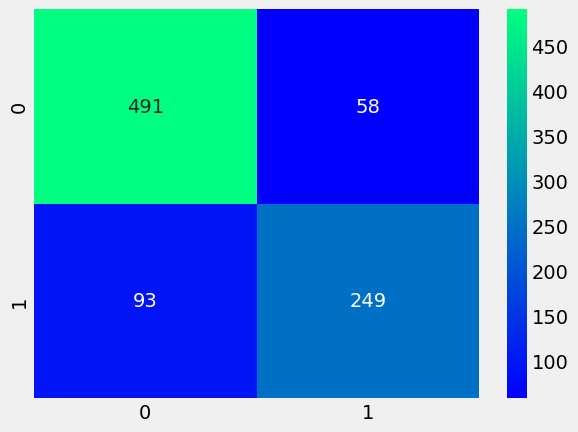

In [ ]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## Feature Importance

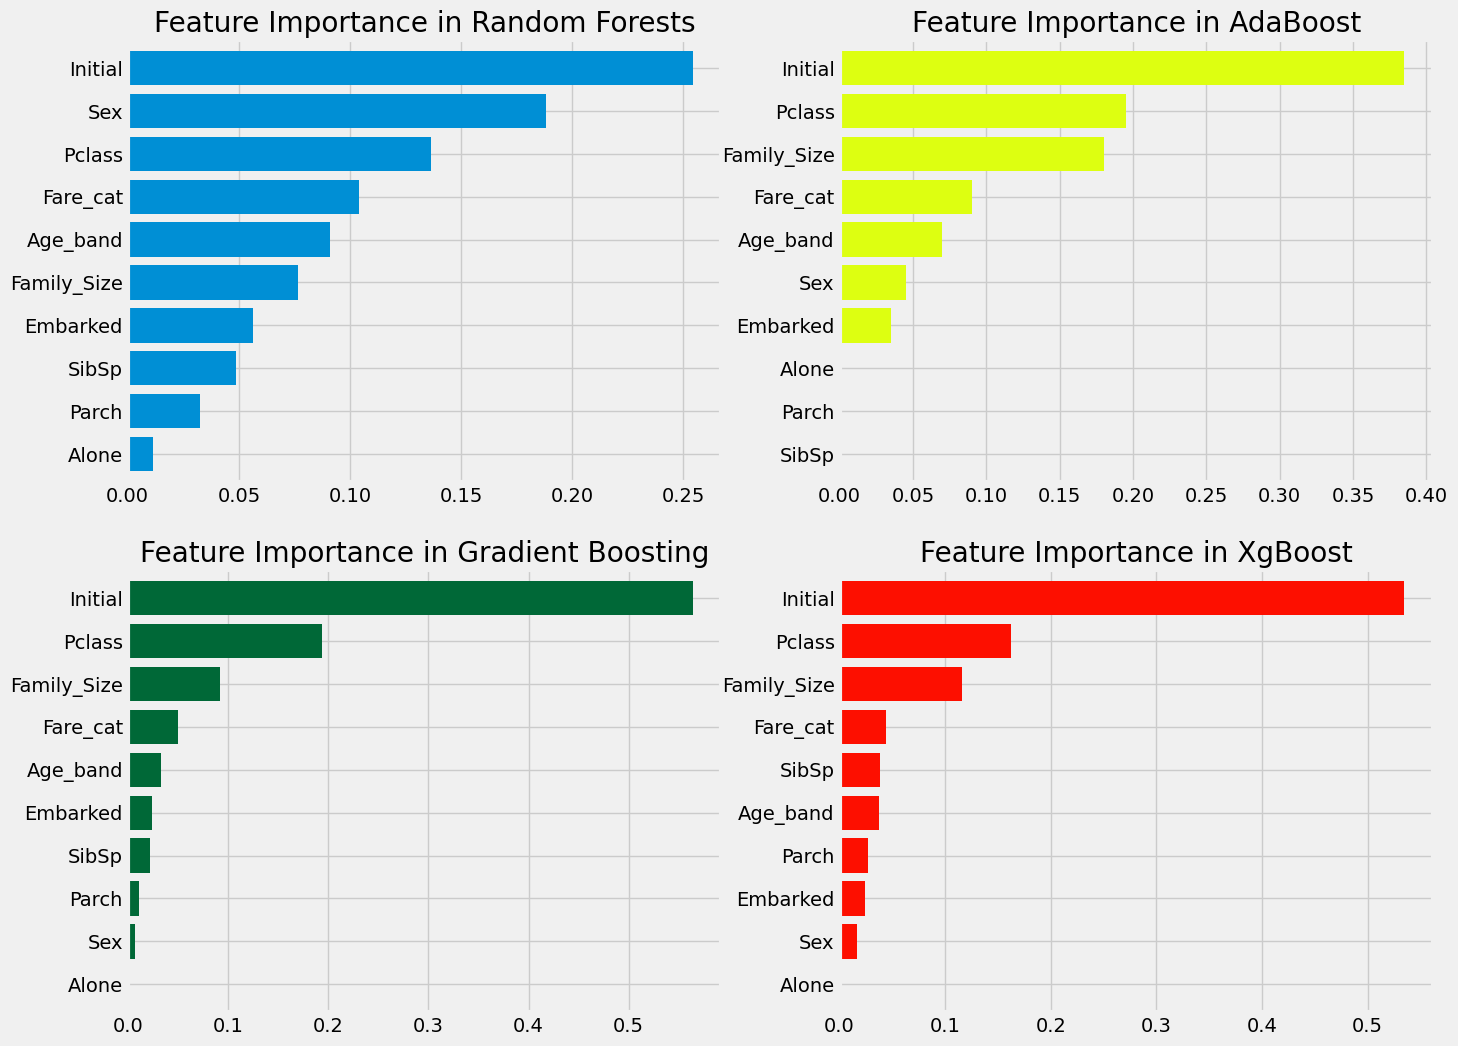

In [ ]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

Observation

1. Some of the common importance features are Initial, Fare_cat, Pclass, Family_Sixe

2. The Sex feature doesn't seem to give any importance, which is shocking as we had seen  earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only in RandomForests.

    However, we can see the feature Initial, which is at the top in many classifiers.We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.

3. Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone,Parch and SibSp.